# Chair analysis for novelty, transience and resonance

**Problématique** : Avoir une mesure de la qualité de la délibération


- Est-ce que parler plus apporte plus de nouveauté ? : intervention des speakers par topics de chair
- Nouveauté/transience/résonance des topics au sein des chairs par interlocuteur


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
path = os.getcwd()

In [9]:
df = pd.read_csv(path+'/lem_clean_version_8.csv', low_memory=True)

In [10]:
df.head()

,Unnamed: 0,index,Date,interlocutor_name,statement _size,statement,statement_number,chair_in_charge,score_academ,score_hostile,score_econo,score_virtue,score_vice,score_hawkish,score_posi,score_affi,score_uncert,lemmatized
0,0,0,1976-08-17,BURNS,41,ready start meeting morning first item busines...,statement_0,CHAIRMAN BURNS,0.0,0.04878,0.024390,0.048780,0.0,0.0,-1.0,1.0,-0.000000,ready start meeting morning item business act...
1,1,1,1976-08-17,HOLMES,2,statementsee appendix,statement_1,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.000000,statementsee appendix
2,2,2,1976-08-17,BLACK,27,alan think realignment currencies european com...,statement_2,CHAIRMAN BURNS,0.0,0.00000,0.037037,0.037037,0.0,0.0,1.0,1.0,-0.000000,alan think realignment currency european comm...
3,3,3,1976-08-17,HOLMES,49,two alternatives one everybody goes floats sep...,statement_3,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,-1.0,-0.020408,alternative everybody go float separately sec...
4,4,4,1976-08-17,BLACK,8,think would likely,statement_4,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.000000,think likely


((100, 1783), (1783,), (100, 1783))

## Novelty, transience and resonance density plots

In [90]:
nb_topic=100
scale = 1000 # 7 or 1000
example_NTR_path = f"/Users/h2jw/Documents/GitHub/NLP-FOMC/novelty_transience_resonance/all data/{nb_topic} topics/novel_trans_reson_w{scale}.txt"
dfNTR = pd.read_table(example_NTR_path, sep=' ',
                       header=None, names=['Novelty', 'Transience', 'Resonance'])

In [91]:
dfNTR.head()

,Novelty,Transience,Resonance
0,41.472877,41.944843,-0.471965
1,49.944565,51.716883,-1.772319
2,36.940625,43.653206,-6.712581
3,34.829190,40.916296,-6.087105
4,40.985453,35.819025,5.166428


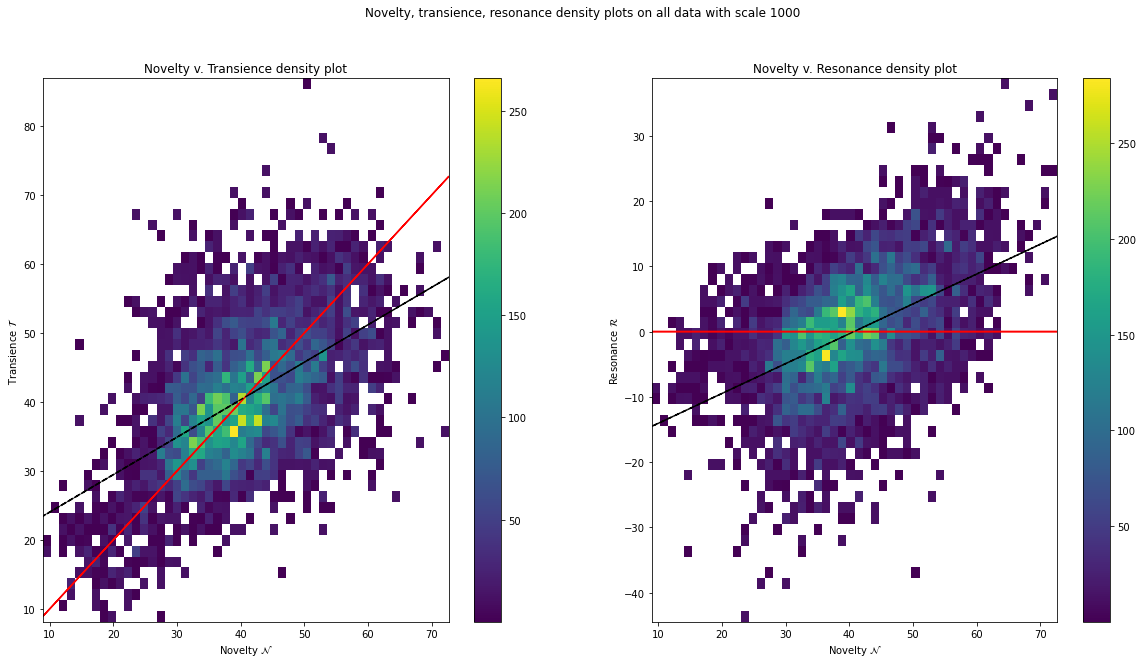

In [92]:
cmap = plt.cm.get_cmap("viridis").copy()
cmap.set_under('white')
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.hist2d(dfNTR['Novelty'], dfNTR['Transience'], bins=(50, 50), cmap=cmap, vmin=0.0001)
plt.colorbar()
plt.plot(dfNTR['Novelty'],dfNTR['Novelty'], color='red')
plt.xlabel('Novelty $\mathcal{N}$')
plt.ylabel('Transience $\mathcal{T}$')
plt.title('Novelty v. Transience density plot')
m, b = np.polyfit(dfNTR['Novelty'], dfNTR['Transience'], 1)
plt.plot(dfNTR['Novelty'],m*dfNTR['Novelty']+b, '--k' )


plt.subplot(122)
plt.hist2d(dfNTR['Novelty'], dfNTR['Resonance'], bins=(50, 50), cmap=cmap, vmin=0.0001)
plt.colorbar() 
plt.plot(dfNTR['Novelty'],np.zeros(len(dfNTR['Novelty'])), color='red')
m, b = np.polyfit(dfNTR['Novelty'], dfNTR['Resonance'], 1)
plt.plot(dfNTR['Novelty'],m*dfNTR['Novelty']+b, '--k' )
plt.xlabel('Novelty $\mathcal{N}$')
plt.ylabel('Resonance $\mathcal{R}$')
plt.title('Novelty v. Resonance density plot')

plt.suptitle(f"Novelty, transience, resonance density plots on all data with scale {scale}")
plt.savefig(f'all_data_{nb_topic}_{scale}.png')